In [ ]:
1. Defining Problem Statement and Analysing basic metrics

Problem Statement: The market research team at AeroFit aims to identify the key characteristics of the target audience for each treadmill model
offered by the company. By analyzing these differences, they hope to improve their recommendations to new customers, ensuring they receive the most 
suitable treadmill based on their specific needs and characteristics.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/DELL/Desktop/DataSets/businesscase_aerofit_treadmill.txt")
df.shape

(180, 9)

In [18]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [63]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [101]:
df.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [ ]:
Insights based on above results:

The dataset consists of 180 rows and 9 columns: Product, Age, Gender, Education, MaritalStatus, Usage, Fitness, Income, and Miles. 
There are no missing values, simplifying the data preparation process. KP281 is the most ordered product, with 80 purchases. 
The age of customers ranges from 18 to 50, with most being 33 or younger. 
The high standard deviation in the Income and Miles columns is attributed to the presence of outliers.

In [ ]:
2. Non-Graphical Analysis: Value counts and unique attributes

In [77]:
df["Product"].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [115]:
df["Gender"].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

In [83]:
df["MaritalStatus"].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

In [85]:
df["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [87]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [89]:
df["MaritalStatus"].unique()

array(['Single', 'Partnered'], dtype=object)

In [103]:
age_bins = pd.cut(df['Age'], bins=[18, 30, 40, 50])
age_bins.value_counts()/len(df) *100

Age
(18, 30]    66.111111
(30, 40]    26.666667
(40, 50]     6.666667
Name: count, dtype: float64

In [95]:
income_bins = pd.cut(df['Income'], bins=[25000, 45000, 65000, 85000, 105000])
income_bins.value_counts()

Income
(45000, 65000]     103
(25000, 45000]      49
(85000, 105000]     17
(65000, 85000]      11
Name: count, dtype: int64

In [111]:
miles_bins = pd.cut(df['Miles'], bins=[50, 100, 150, 200, 250, 300, 350, 400])
miles_bins.value_counts()/len(df) * 100

Miles
(50, 100]     53.888889
(100, 150]    21.111111
(150, 200]    12.222222
(250, 300]     1.666667
(200, 250]     1.111111
(350, 400]     0.555556
(300, 350]     0.000000
Name: count, dtype: float64

In [99]:
pd.crosstab(df['Product'], df['Gender'])

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


In [ ]:
Insights based on above results:

The dataset reveals that KP281 is the most popular treadmill, followed by KP481. 
The majority of users (66%) are aged 18 to 30, suggesting that the primary customer base is in the Provisional Adulthood stage. 
About 50% of users walk or run an average of 50 to 100 miles weekly. 
Additionally, more males (104) than females (76) have purchased these treadmills, indicating a stronger purchasing trend among men.

In [ ]:
3. Visual Analysis - Univariate & Bivariate

Univariate Analysis for all the quantitative columns:

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

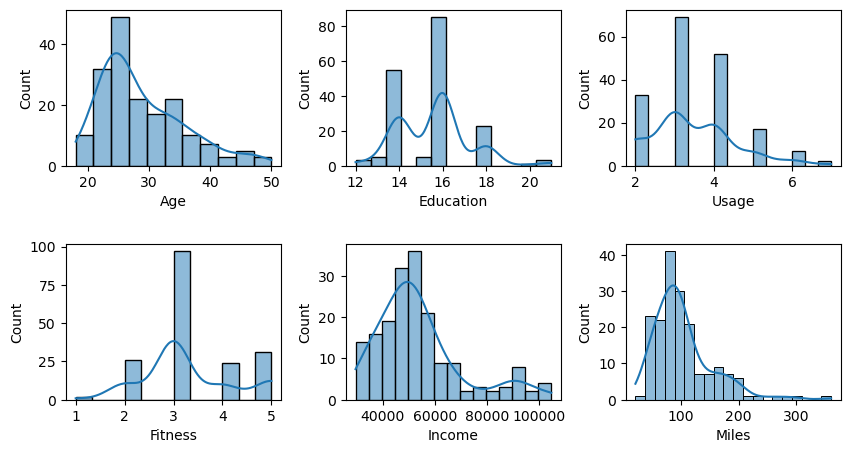

In [175]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(10,10))
fig.subplots_adjust(top=0.5, wspace=0.3, hspace=0.5)

sns.histplot(data=df, x="Age", kde=True, ax=axis[0, 0])

sns.histplot(data=df, x="Education", kde=True, ax=axis[0, 1])

sns.histplot(data=df, x="Usage", kde=True, ax=axis[0, 2])

sns.histplot(data=df, x="Fitness", kde=True, ax=axis[1, 0])

sns.histplot(data=df, x="Income", kde=True, ax=axis[1, 1])

sns.histplot(data=df, x="Miles", kde=True, ax=axis[1, 2])

plt.show()


In [ ]:
Insights based on Univarite Analysis:

Customers aged 20 to 30 are the most frequent purchasers.
The majority have 16 years of education (80 people), followed by 14 years (about 58 people).
Over 60 people use their treadmill an average of 3 times per week.
Most treadmill buyers have a fitness level of 3.
The majority of customers have an income ranging from $45,000 to $60,000.
Most customers walk or run between 20 to 100 miles weekly.
                                                                                        

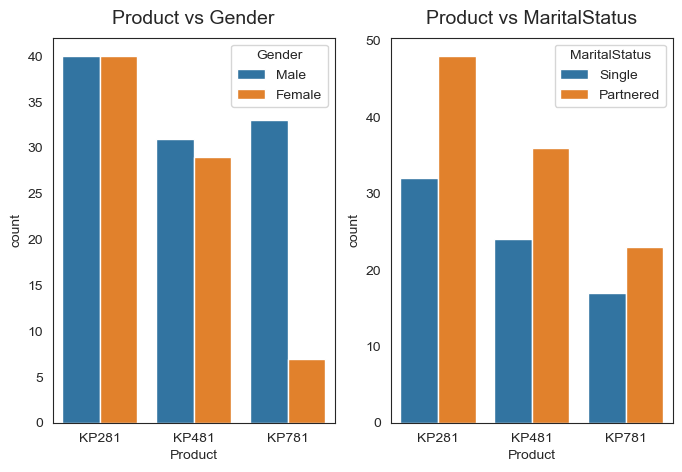

In [402]:
# Bi-variate analysis:

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
sns.countplot(data=df, x='Product', hue='Gender', ax=axs[0])
sns.countplot(data=df, x='Product', hue='MaritalStatus', ax=axs[1])
axs[0].set_title("Product vs Gender", pad=10, fontsize=14)
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)
plt.show()

<!-- Analysis:
KP281 is the most ordered product from the both male and female. KP781 has advanced features and this product is majorly ordered by men. It states
only few women are preferring adanced featured treadmill. Partenred peope are purchasing more treadmills in each type. This states that partenred people
are dominating single's in purchasing treadmills. -->

In [400]:
# Analysing the data for the qualitative attributes:

df1 = df[['Product', 'Gender', 'MaritalStatus']].melt()
(df1.groupby(['variable', 'value'])[['value']].count() / len(df)).round(2)

value
variable      value           
Gender        Female      0.42
              Male        0.58
MaritalStatus Partnered   0.59
              Single      0.41
Product       KP281       0.44
              KP481       0.33
              KP781       0.22

In [ ]:
Insights for Bi-variate analysis:

Most customers (44.44%) purchased the KP281 product, with 33.33% choosing KP481, and 22.22% opting for KP781. 
In terms of gender, 57.78% of the customers are male. 
Additionally, 59.44% of the customers are partnered, indicating a significant portion of the customer base is in a relationship.

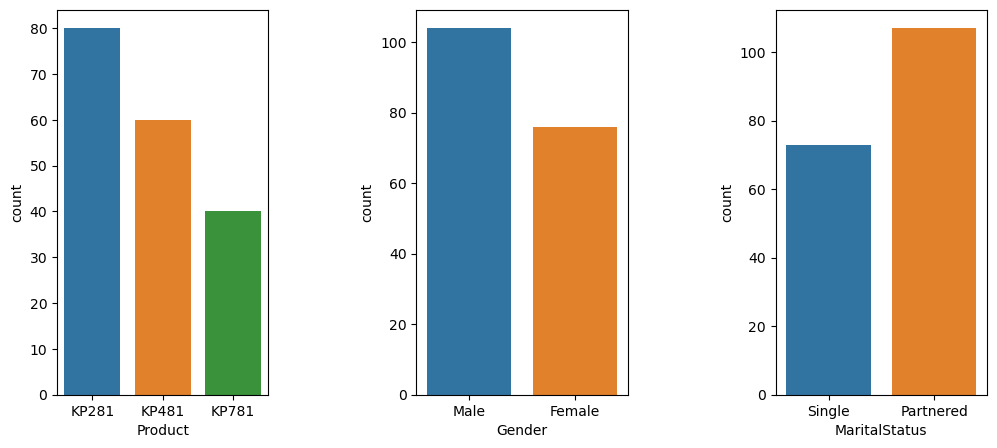

In [215]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,5))
fig.subplots_adjust(wspace=0.7, hspace=0.5)

sns.countplot(data=df, x='Product', ax=axs[0])
sns.countplot(data=df, x='Gender', ax=axs[1])
sns.countplot(data=df, x='MaritalStatus', ax=axs[2])
plt.show()


In [ ]:
Insights:

The most purchased treadmill is KP281. Males have bought more products than females, and partnered individuals have 
made more purchases compared to singles.

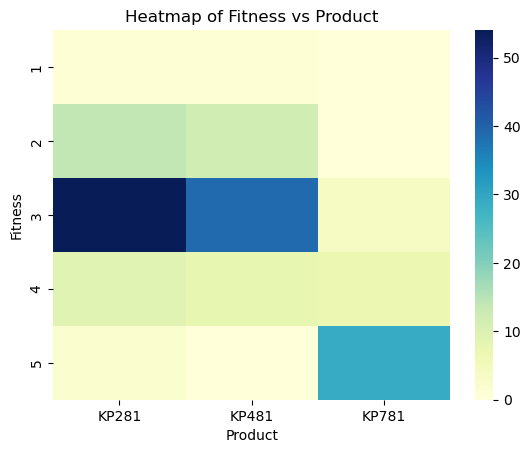

In [275]:
#Coorelation between Fitness and Product:

pivot_table = pd.crosstab(df['Fitness'], df['Product'])
sns.heatmap(pivot_table, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of Fitness vs Product')
plt.xlabel('Product')
plt.ylabel('Fitness')
plt.show()

In [278]:
Insights:

The heatmap indicates a strong correlation between KP281 and fitness level 3 (intermediate). 
Customers with a fitness level of 3 are more likely to purchase KP281 and KP481 treadmills.

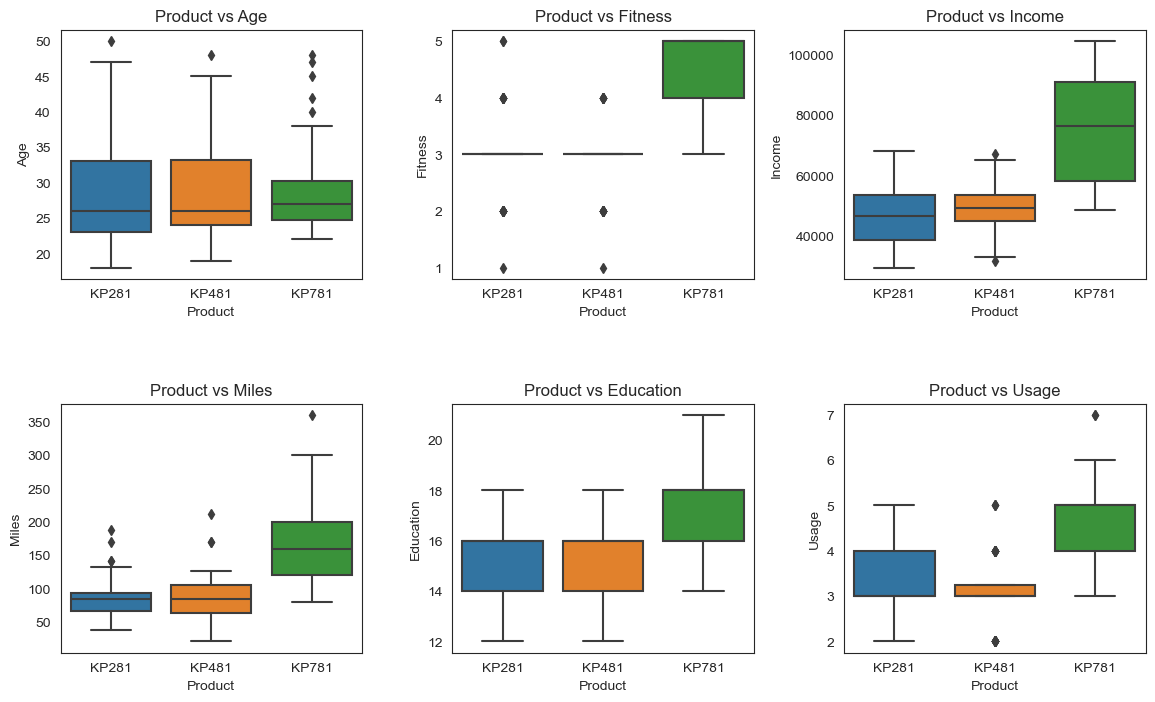

In [406]:
# Analysing every attribute impact on Product

attribute = ['Age', 'Fitness', 'Income', 'Miles', 'Education', 'Usage']
# sns.set_style("white")
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(14, 7))
fig.subplots_adjust(top=1, wspace=0.3, hspace=0.5)
cnt = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df, x='Product', y=attribute[cnt], ax=axs[i,j])
        axs[i,j].set_title(f"Product vs {attribute[cnt]}", fontsize=12)
        cnt += 1


In [ ]:
Insights based on the impact of each attribute on product choice:

Product vs Age:
Customers buying KP281 and KP481 have the same median age.
Customers aged 25-30 are more likely to purchase the KP781 product.

Product vs Fitness:
Customers with a fitness level of 3 or higher are more likely to buy the KP781 product.
Lower fitness levels are less associated with purchasing KP781.

Product vs Income:
Customers with an income of 60,000 or more are more inclined to purchase the KP781 product.
Those with income in the range 40k to 55k usd are more likely to choose KP281 & KP481.

Product vs Miles:
Customers who walk/run more than 110 miles per week are more likely to buy the KP781 product.

Product vs Education:
Customers with education above 16 are more likely to buy KP781.
Those with education below 16 are equally likely to purchase KP281 or KP481.

Product vs Usage:
Customers using the treadmill more than 4 times a week prefer KP781.
Others are more likely to buy KP281 or KP481.

In [ ]:
4. Missing Value & Outlier Detection.
Missing values: There are no Missing values in the dataset.

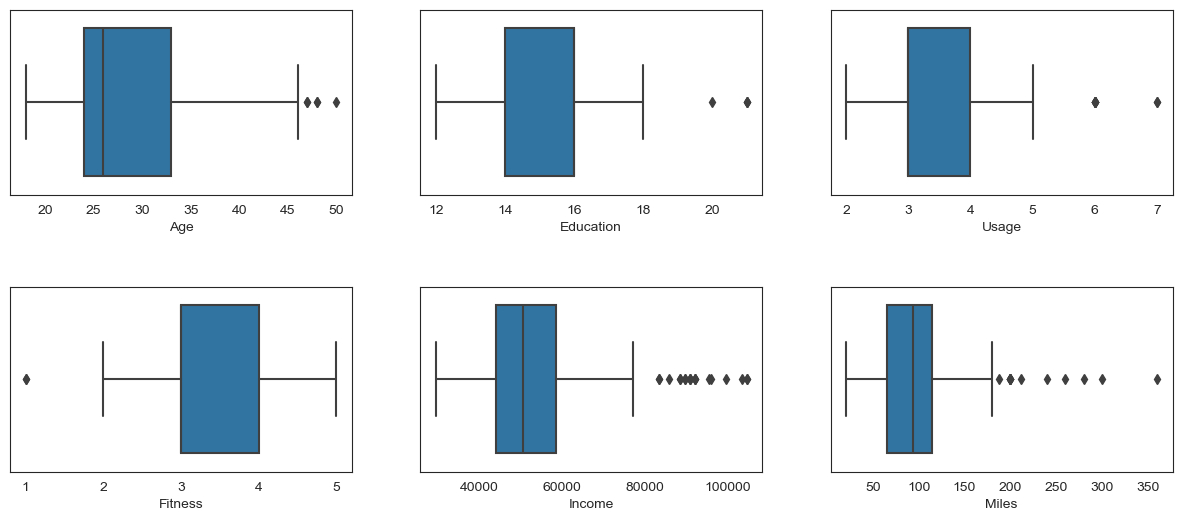

In [344]:
# Identifying outlier:

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(15, 6))
fig.subplots_adjust(hspace=0.5)
sns.boxplot(data=df, x="Age", ax=axis[0,0])
sns.boxplot(data=df, x="Education", ax=axis[0,1])
sns.boxplot(data=df, x="Usage", ax=axis[0,2])
sns.boxplot(data=df, x="Fitness", ax=axis[1,0])
sns.boxplot(data=df, x="Income", ax=axis[1,1])
sns.boxplot(data=df, x="Miles", ax=axis[1,2])
plt.show()

In [ ]:
Insights based on outlier detection:

Income and Miles have more outliers compared to the other attributes.

In [349]:
5. Business Insights based on Non-Graphical and Visual Analysis (10 Points)
Comments on the range of attributes
Comments on the distribution of the variables and relationship between them
Comments for each univariate and bivariate plot

Note:
For above Non-graphical and visual analysis, I've given comments/Insights under the charts for better understanding.

In [397]:
# Conditional Probability:

def gender(gender):

    df1 = pd.crosstab(index=df['Gender'], columns=[df['Product']])
    product_281 = df1['KP281'][gender] / df1.loc[gender].sum()
    product_481 = df1['KP481'][gender] / df1.loc[gender].sum()
    product_781 = df1['KP781'][gender] / df1.loc[gender].sum()

    print(f"P({gender}) = {df1.loc[gender].sum()/len(df):.3f}")
    # print(f"P(Female) = {df1.loc['Female'].sum()/len(df):.3f}\n")
    print(f"P(KP281/{gender}) = {product_281:.3f}")
    print(f"P(KP481/{gender}) = {product_481:.3f}")
    print(f"P(KP781/{gender}) = {product_781:.3f}\n")

gender('Male')
gender('Female')

P(Male) = 0.578
P(KP281/Male) = 0.385
P(KP481/Male) = 0.298
P(KP781/Male) = 0.317

P(Female) = 0.422
P(KP281/Female) = 0.526
P(KP481/Female) = 0.382
P(KP781/Female) = 0.092



In [ ]:
Insights based on Marginal Probability:

Male Customers:
Product Preference: Male customers are more likely to purchase the KP281 product (38.5%) compared to KP481 (29.8%) and KP781 (31.7%).
Distribution: The preference among male customers is relatively balanced between the three products, with a slight preference for KP281.

Female Customers:
Product Preference: Female customers show a strong preference for the KP281 product, with 52.6% opting for it.
Less Likely to Choose KP781: Female customers are much less likely to purchase the KP781 product (9.2%) compared to KP481 (38.2%) and KP281.

KP281 Dominance: KP281 is the most popular product among both male and female customers, but especially so among females.
Gender Differences in KP781: There's a noticeable difference in preference for KP781 between genders, with males being more likely to purchase 
it than females.

In [368]:
# Marginal Probability:

df["Product"].value_counts(normalize=True)

Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: proportion, dtype: float64

In [ ]:
Insights based on Marginal Probability:

KP281: Nearly 44.44% of all customers prefer the KP281 product, making it the most popular choice.
KP481: About 33.33% of customers opt for the KP481 product, indicating a moderate preference.
KP781: The KP781 product is the least popular, chosen by 22.22% of customers.

In [ ]:
6. Recommendations - Actionable items for business:

1. Focus on KP281:
Promote KP281: Because it is the most sold treadmill, keep on highlighting it in marketing and see to its availability.
Leverage Female Preferences: The female clientele has a special liking for KP281. This means that offering sales promotions aimed at this 
segment can push sales up.
    
2.Target Age Group 20-30:
Tailored Marketing: Marketing should be developed that appeals to the 20-30 age group, focusing on the benefits of KP281 and KP481.

3.Address Income and Fitness Levels:
Premium Product Promotion: Put more emphasis on promoting KP781 to high income earners and those with higher 
fitness levels by selling its advanced features.
Segment Offers: Provide incentives for customers with incomes between $45,000 and $60,000 to buy either KP281 or KP481.

4.Enhance Product Usage:
High Usage Treadmills: For users who will use treadmills more than 4 times a week, highlight how durable they are as well as 
their characteristics such as those found in KP781.
General Use Products: In case of low usage of treadmills use such products as KP281 andKP481 which are cheap and multipurpose.

5. Education-based Targeting
Higher Education Outreach: Focus on marketing KP781 to the customers who have attained higher education while emphasizing its superior features.

6. Gender-Specific Strategies
Men’s Choices: Given that men are more likely to buy treadmills, adjust marketing and sales strategies in order to better target male consumers.
Encourage Female purchasers: For women buying into KP281 products, consider implementing focused promotions or loyalty programs to increase involvement.